In [1]:
import nibabel as nib
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x1 = np.arange(12.0).reshape((2, 2, 3))
x2 = np.arange(4.0).reshape((2,2,1))

x3 = 0.5* np.add(x2, x1)
print(x1, x2, x3.shape)

In [ ]:
x = [1,2,3]
y = np.zeros_like(x)
y = np.array([y,y,y])
print(y)

In [ ]:
np.array([[1,2,3],[4,5,6]])/6


In [ ]:
imgx = cv2.imread('x.png')
imgx = cv2.resize(imgx, (180, 100))
imgy = cv2.imread('y.png')
imgy = cv2.resize(imgy, (180, 100))
imgz = cv2.imread('z.png')
imgz = cv2.resize(imgz, (180, 100))
print(imgx.shape,imgy.shape ,imgz.shape )

imgx

In [ ]:
# !pip install opencv-python

In [ ]:
array_data = np.arange(24, dtype=np.int16).reshape((2, 3, 4))
affine = np.diag([1,1,1, 1])
ar = [imgx, imgy, imgz]
arr = [ar[i%3] for i in range(128) ]
arr = np.array(arr)
print(arr.shape)
array_img = nib.Nifti1Image(arr, affine)


In [ ]:
array_img

pair_img = nib.Nifti1Pair(array_data, np.eye(4))
nib.save(pair_img, 'my_pair_image.img')

In [140]:
#  nib.save(array_img, './xyz.mgz')
data = nib.load('/home/abhijit/Jyotirmay/hiwi/nn_api/nn_api/downloads/abc.mgz')
print(data.header)

x = data.get_data()
print(type(x))
nib.save(x, 'abc.mgz')

data_ = nib.load('/home/abhijit/Jyotirmay/hiwi/nn_api/nn_api/downloads/quicknat.mgz')
print(data_.header)

<class 'nibabel.freesurfer.mghformat.MGHHeader'> object, endian='>'
version      : 1
dims         : [256 256 256   1]
type         : 0
dof          : 0
goodRASFlag  : 1
delta        : [1. 1. 1.]
Mdc          : [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Pxyz_c       : [128. 128. 128.]
tr           : 0.0
flip_angle   : 0.0
te           : 0.0
ti           : 0.0
fov          : 256.0
<class 'numpy.ndarray'>


AttributeError: 'numpy.ndarray' object has no attribute 'to_filename'

In [133]:
slicer = data_.ImageSlicer([0, 256, 0])
slicer

AttributeError: 'list' object has no attribute 'shape'

In [131]:
views = ['Coronal XZ', 'Sagittal YZ', 'Axial XY']
def _select_ImageJ_trasformations(data, slice_obj, views, ii):
    if views[ii] == views[0]:
        return np.rot90(data[slice_obj], k=1)  # coronal
    elif views[ii] == views[1]:
        return np.fliplr(np.rot90(data[slice_obj]))  # sagittal
    else:
        return np.flipud(data[slice_obj])  # axial
    
    
_select_ImageJ_trasformations(data_, slicer, views, 1)

TypeError: Cannot slice image objects; consider using `img.slicer[slice]` to generate a sliced image (see documentation for caveats) or slicing image array data with `img.dataobj[slice]` or `img.get_data()[slice]`

<class 'numpy.ndarray'>
<OrthoSlicer3D: (256, 256, 256)>


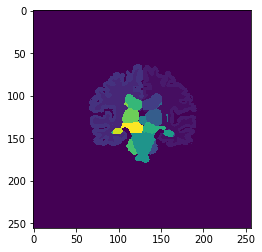

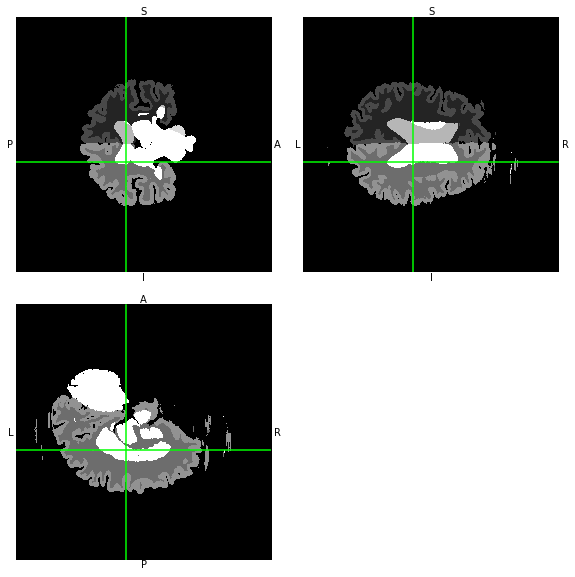

In [137]:
# from nibabel import OrtoSlicer3D
import nibabel as nb
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import clear_output
clear_output()
# a = np.sin(np.linspace(10, np.pi, 20))
# b = np.sin(np.linspace(10, np.pi*5, 20))
# data = np.outer(a, b)[..., np.newaxis] * a
data_x = data.get_fdata()
print(type(data_x))

# 0:coronal,1:axial,2:saggital

plt.imshow(data_x[110, :, :])
aff = [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]
# data_y = nb.orientations.apply_orientation(data_x, [0])
data_y = data_x
nbviewer = nb.viewers.OrthoSlicer3D(data_y, aff)
print(nbviewer)
nbviewer.set_position(110,110,110)
    
def view(x,y,z):
    nbviewer_ = nb.viewers.OrthoSlicer3D(data_y)
    nbviewer_.set_position(x,y,z)

# def reset(x,y,z):
#     nbviewer.close()
#     view(x,y,z)
   


# interact(view, x=widgets.IntSlider(min=0,max=150,step=1,value=110), y=widgets.IntSlider(min=0,max=150,step=1,value=110),z=widgets.IntSlider(min=0,max=150,step=1,value=110));

[[1 2]
 [4 5]]
[[-1 -2]
 [ 4  5]]


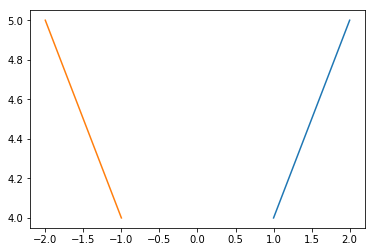

In [121]:
x = np.array([[1,2], [4,5]])

print(x)
# y = (np.eye(3), x)

t = np.array([[-1,0],[0,1]])
y = np.matmul(t, x)
print(y)
plt.plot(x[0], x[1])
# plt.show()
plt.plot(y[0], y[1])
plt.show()

In [ ]:
img_data = array_img.get_fdata()

In [ ]:
img_data = np.swapaxes(img_data,1,3)

img_data.shape


In [ ]:
img_data = np.swapaxes(img_data,2,3)
img_data.shape

In [ ]:
cv2.imwrite('./here_11.png', img_data[11])

In [ ]:
plt.imshow(img_data)

In [6]:
img = cv2.imread('here_11.png')
img.shape

(100, 180, 3)

In [3]:
import base64

In [8]:
x = cv2.imencode('.png', img)[1]
# jpg_as_text = base64.b64encode(buffer)
# jpg_as_text = jpg_as_text.decode('utf-8')
x = np.array(x).reshape(100, 180, 3)
print(x)

ValueError: cannot reshape array of size 14278 into shape (100,180,3)

In [ ]:
import torch

In [ ]:
torch.cuda.set_device(0)
# torch.cuda.get_device_name()
torch.cuda.current_device()